In [1]:
import matplotlib.pyplot as plt
import numpy as np

max_iter = 100

In [2]:
showPlt = False
def readData(param):
    points = []
    txt = open(param, "r")
    lines = txt.readlines()
    for i in lines:
        tmp = i.split()
        tmp[0] = int(tmp[0])
        tmp[1] = int(tmp[1])
        points.append(tmp)
    points = np.array(points)
    return points

In [3]:
def generateRandomCentroids(X):
    centroids = np.zeros((klstr, numOfParam))

    for k in range(klstr):
        centroid = X[np.random.choice(range(numOfPoints))]
        centroids[k] = centroid

    # print("centroids rnd:")
    # print(centroids,"\n")
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='black')
    plt.show()
    return centroids

In [4]:
def calculate_new_centroids(clusters, X):
    centroids = np.zeros((klstr, numOfParam))
    for idx, cluster in enumerate(clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[idx] = new_centroid
    return centroids

In [5]:
def create_clusters(X, centroids):
    # [[clstr1]...[clstrN]] empty
    clusters = [[] for _ in range(klstr)]

    # for each point find closest cluster
    for point_idx, point in enumerate(X):
        closest_centroid = np.argmin(np.sqrt(np.sum((point - centroids) ** 2, axis=1)))
        clusters[closest_centroid].append(point_idx)
    # print("clusters: \n")
    # print(clusters)
    return clusters

In [6]:
def predict_cluster(clusters, X):
    y_pred = np.zeros(numOfPoints)# пустой enum

    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_pred[sample_idx] = cluster_idx

    # print("y_pred: \n")# (элемент,cluster №)
    # for item in enumerate(y_pred):
    #     print(item)
    return y_pred

In [7]:
def processData(data):
    centroids = generateRandomCentroids(data)
    count = 0

    for it in range(max_iter):
        count += 1
        clusters = create_clusters(data, centroids)

        previous_centroids = centroids
        centroids = calculate_new_centroids(clusters, data)

        diff = centroids - previous_centroids

        if not diff.any():
            showPlt = True
            print("iter: ", count)
            break

    # print("New centroids: \n",centroids)
    y_pred = predict_cluster(clusters, data)

    if showPlt:
        plt.scatter(data[:, 0], data[:, 1], c=y_pred, s=40, cmap=plt.cm.Spectral)
        plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='black')
        plt.show()
    # return y_pred

In [8]:
def switch(x):
   return {
       "1": readData("points datasets/s1.txt"),
       "2": readData("points datasets/birch1.txt"),
       "3": readData("points datasets/birch2.txt"),
       "4": readData("points datasets/birch3.txt")
   }.get(x, -1)

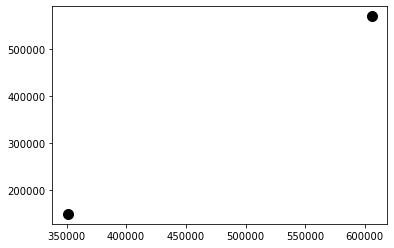

iter:  10


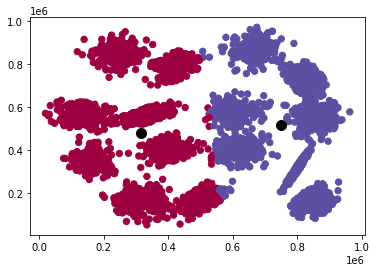

In [9]:
data = switch(input("1. s1.txt\n2. birch1.txt\n3. birch2.txt\n4. birch3.txt\n Select file: "))
klstr = int(input("Input amount of clusters: "))
numOfPoints = data.shape[0] # к-во точек
numOfParam = data.shape[1]  # координат(2)
processData(data)